# Imports

In [65]:
import os
import pandas as pd
from typing import Optional

from utils.makepath import makepath as mkp

In [30]:
from sithom.plot import (
    plot_defaults,
    label_subplots,
    get_dim,
    set_dim,
    PALETTE,
    STD_CLR_LIST,
    CAM_BLUE,
    BRICK_RED,
    OX_BLUE,
)

# # Use Latex (optional)
uses_latex = True
# uses_latex = False
plot_defaults(use_tex=uses_latex)

# Helpers

In [62]:
loss_key = "loss"
psnr_key = "psnr"
ssim_key = "ssim"

def print_mean_and_std(df):
    loss_mean = df[loss_key].mean()
    loss_std = df[loss_key].std()
    psnr_mean = df[psnr_key].mean()
    psnr_std = df[psnr_key].std()
    ssim_mean = df[ssim_key].mean()
    ssim_std = df[ssim_key].std()
    # print(f"{psnr_mean:.2f} ± {psnr_std:.2f} \t {ssim_mean:.4f} ± {ssim_std:.3f}", end="\t")
    print(f"{psnr_mean:.2f} ± {psnr_std:.2f} \t {ssim_mean:.4f} ± {ssim_std:.3f}")
    # print(f"{loss_mean:.6f} ± {loss_std:.6f} \t {psnr_mean:.2f} ± {psnr_std:.2f} \t {ssim_mean:.4f} ± {ssim_std:.3f}")

# Paths

In [39]:
root_dir = mkp("..", "..")
results_dir = mkp(root_dir, "tmp")
model_name = "mri_model_09_12-23_02-good_TGV-sigma_to_0_2-R_from_4"
model_dir = mkp(results_dir, model_name)
results_dir = mkp(model_dir, "checkpoint_30")

In [40]:
os.listdir(results_dir)

['test-R_6-sigma_0_20_intermediate_metrics.csv',
 'val-R_4-sigma_0_05_intermediate_metrics.csv',
 'test-R_4-sigma_0_10_intermediate_metrics.csv',
 'test-R_4-sigma_0_05_intermediate_metrics.csv',
 'model_state_dict_30.pth',
 'test-R_6-sigma_0_05_intermediate_metrics.csv',
 'test-R_8-sigma_0_20_intermediate_metrics.csv',
 'test-R_6-sigma_0_10_intermediate_metrics.csv',
 'test-R_4-sigma_0_20_intermediate_metrics.csv',
 'test-R_6-sigma_0_15_intermediate_metrics.csv',
 'test-R_8-sigma_0_10_intermediate_metrics.csv',
 'test-R_8-sigma_0_05_intermediate_metrics.csv',
 'test-R_8-sigma_0_15_intermediate_metrics.csv',
 'test-R_4-sigma_0_15_intermediate_metrics.csv']

# Results

In [41]:
acc_R = 4
sigma = 0.05

csv_file = f"test-R_{acc_R}-sigma_{sigma:.2f}_intermediate_metrics".replace(".", "_") + ".csv"

In [42]:
df = pd.read_csv(mkp(results_dir, csv_file))

In [43]:
df.head()

,epoch,iter,loss,psnr,ssim
0,1,1,0.000212,32.740307,0.884298
1,1,2,0.000334,32.531658,0.695213
2,1,3,0.000662,33.287067,0.679704
3,1,4,0.000172,31.819696,0.867264
4,1,5,0.000489,30.590446,0.831022


In [49]:
print_mean_and_std(df)

31.89 ± 2.22 	 0.7970 ± 0.080


# Plots

array([[<Axes: title={'center': 'loss'}>]], dtype=object)

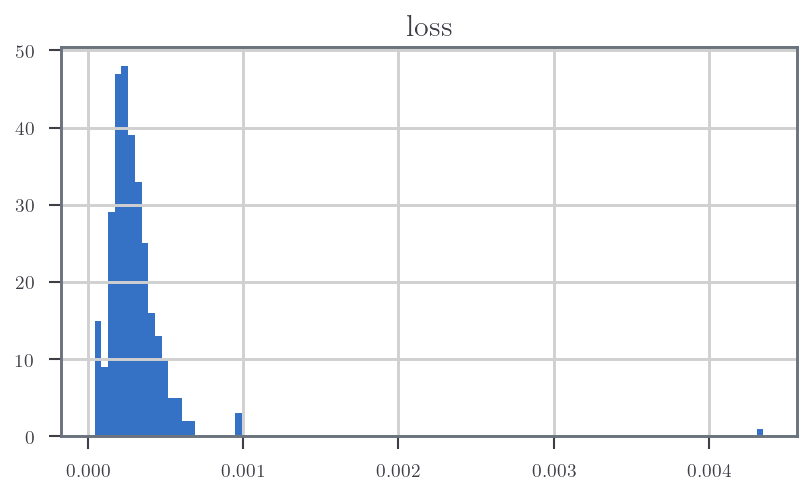

In [45]:
df.hist(column="loss", bins=100)

array([[<Axes: title={'center': 'psnr'}>]], dtype=object)

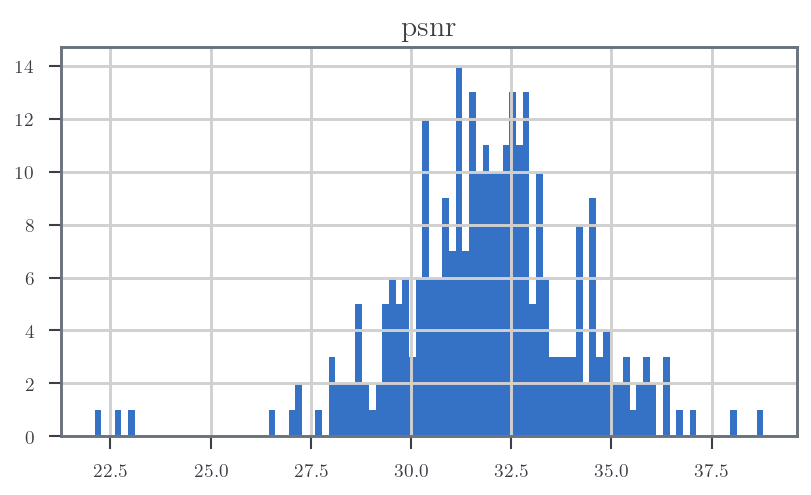

In [46]:
df.hist(column="psnr", bins=100)

array([[<Axes: title={'center': 'ssim'}>]], dtype=object)

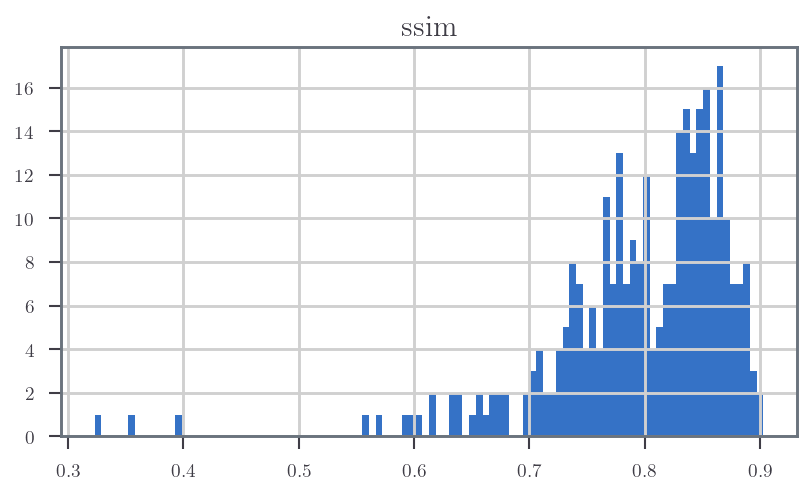

In [47]:
df.hist(column="ssim", bins=100)

# Combined

In [66]:
def load_and_display_results(
        acc_R: int,
        sigma: float,
        model_name: str,
        checkpoint: Optional[int] = None,
) -> pd.DataFrame:
    root_dir = mkp("..", "..")
    results_dir = mkp(root_dir, "tmp")
    model_dir = mkp(results_dir, model_name)
    if checkpoint is None:
        results_dir = model_dir
    else:
        results_dir = mkp(model_dir, f"checkpoint_{checkpoint}")
    csv_file = f"test-R_{acc_R}-sigma_{sigma:.2f}_intermediate_metrics".replace(".", "_") + ".csv"
    df = pd.read_csv(mkp(results_dir, csv_file))
    print_mean_and_std(df)
    return df

In [60]:
df = load_and_display_results(
    acc_R=4,
    sigma=0.05,

    model_name="mri_model_09_12-23_02-good_TGV-sigma_to_0_2-R_from_4",
    checkpoint=30,
)

0.000302 ± 0.000273 	 31.89 ± 2.22 	 0.7970 ± 0.080


In [67]:
for acc_R in [4, 6, 8]:
    for sigma in [0.05, 0.10, 0.15, 0.20]:
        load_and_display_results(
            acc_R=acc_R,
            sigma=sigma,

            model_name="mri_model_09_12-23_02-good_TGV-sigma_to_0_2-R_from_4",
            checkpoint=30,
        )

31.89 ± 2.22 	 0.7970 ± 0.080
31.80 ± 2.19 	 0.7956 ± 0.078
31.59 ± 2.16 	 0.7946 ± 0.077
31.26 ± 2.11 	 0.7932 ± 0.075
29.83 ± 2.21 	 0.7681 ± 0.080
29.81 ± 2.22 	 0.7679 ± 0.078
29.66 ± 2.20 	 0.7669 ± 0.076
29.40 ± 2.15 	 0.7638 ± 0.074
27.38 ± 2.08 	 0.7206 ± 0.074
27.44 ± 2.10 	 0.7231 ± 0.073
27.39 ± 2.10 	 0.7229 ± 0.071
27.24 ± 2.08 	 0.7190 ± 0.070


In [68]:
for acc_R in [4, 6, 8]:
    for sigma in [0.05, 0.10, 0.15, 0.20]:
        load_and_display_results(
            acc_R=acc_R,
            sigma=sigma,

            model_name="mri_model_09_14-14_37-good_TV-sigma_to_0_2-R_from_4",
            checkpoint=20,
        )

31.87 ± 2.21 	 0.6890 ± 0.101
31.70 ± 2.17 	 0.6828 ± 0.099
31.36 ± 2.13 	 0.6822 ± 0.098
30.94 ± 2.09 	 0.6846 ± 0.096
29.39 ± 2.24 	 0.6781 ± 0.099
29.56 ± 2.26 	 0.6674 ± 0.097
29.44 ± 2.22 	 0.6663 ± 0.096
29.15 ± 2.17 	 0.6697 ± 0.093
26.74 ± 2.09 	 0.6410 ± 0.091
27.11 ± 2.18 	 0.6370 ± 0.092
27.23 ± 2.18 	 0.6390 ± 0.091
27.12 ± 2.16 	 0.6460 ± 0.089


In [69]:
for acc_R in [4, 6, 8]:
    for sigma in [0.05, 0.10, 0.15, 0.20]:
        load_and_display_results(
            acc_R=acc_R,
            sigma=sigma,

            model_name="zero_filled"
        )

24.93 ± 1.56 	 0.6361 ± 0.045
24.83 ± 1.55 	 0.6235 ± 0.046
24.65 ± 1.54 	 0.5965 ± 0.047
24.41 ± 1.53 	 0.5607 ± 0.048
23.93 ± 1.56 	 0.6033 ± 0.050
23.85 ± 1.56 	 0.5938 ± 0.052
23.71 ± 1.55 	 0.5685 ± 0.052
23.52 ± 1.54 	 0.5337 ± 0.052
23.08 ± 1.55 	 0.5723 ± 0.053
23.02 ± 1.55 	 0.5648 ± 0.056
22.91 ± 1.55 	 0.5406 ± 0.057
22.76 ± 1.54 	 0.5065 ± 0.056
